## 目的：PythonのStatsModelsを用いて時系列データの分析を行う
最終的にSARIMAモデルを用いた分析を行う

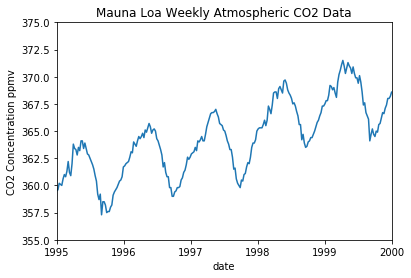

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# データの読み込み(StatsModelsのテストデータを用います)
co2_tsdata = sm.datasets.co2.load_pandas().data
# 欠損値の処理
co2_tsdata2 = co2_tsdata.fillna(method="ffill")

# x軸の期間を1995年から2000年までに、y軸は値を355から375までに指定したうえでデータを折れ線グラフで表してください

# グラフのタイトルを定める
plt.title("Mauna Loa Weekly Atmospheric CO2 Data")
# グラフのx軸とy軸の名前設定
plt.xlabel("date")
plt.ylabel("CO2 Concentration ppmv")
# ここに答えを記入してください
plt.plot(co2_tsdata2)
plt.xlim("1995", "2000")
plt.ylim(355, 375)

plt.show()

時系列データには トレンド 、 周期変動 、 不規則変動 の3つのパターンがある。


・トレンド はデータの長期的な傾向を意味します。時間の経過とともにデータの値が上昇していたり下降していたりする時系列データは
　「トレンドがある」といい、値が上昇している場合には 正のトレンド 下降している場合には 負のトレンド があると言います。

・周期変動 があるデータは時間の経過に伴ってデータの値が上昇と下降を繰り返します。特に1年間での周期変動を 季節変動 といいます。

・不規則変動 は時間の経過と関係なくデータの値が変動することをいいます。

実際の時系列データを観測すると、これら3つのパターンが組み合わさっていることが分かります。


なにもされていない時系列データそのものは 原系列 と呼ばれます。時系列分析の目的はこの 原系列 の性質を探って行くことです。 原系列 のもつ様々な特徴を明らかにして モデル を構築します。そしてその モデル をもとにデータの予測を行ったり時系列データ同士の関連性を明らかにしていくのです。

しかし、時系列分析において 原系列 そのものを扱うことはあまりありません。実際には時系列データを加工し新しい系列にして、それを分析して モデル を構築していきます。

### 対数系列
時系列データの中には、値の変動が大きなデータが多くあります。そのようなデータの変動を穏やかにするのが 対数変換 です。まずは実際にデータを対数変換してみましょう。ここでは対数変換のためにNumpyのnp.log()を用います。

np.log()の使い方は、 np.log(PandasのDataframe型) というように、引数を一つ指定して使います。


In [13]:


import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# データの読み込み
macrodata = sm.datasets.macrodata.load_pandas().data
macrodata.index = pd.Index(sm.tsa.datetools.dates_from_range("1959q1", "2009q3"))

# アメリカの実質GDPの対数変換前の値を表示する
print(macrodata.realgdp.head())

# 対数系列
print("log")
macrodata_realgdp_log = np.log(macrodata.realgdp)

# 表示
print(macrodata_realgdp_log.head())


1959-03-31    2710.349
1959-06-30    2778.801
1959-09-30    2775.488
1959-12-31    2785.204
1960-03-31    2847.699
Name: realgdp, dtype: float64
log
1959-03-31    7.904833
1959-06-30    7.929775
1959-09-30    7.928582
1959-12-31    7.932076
1960-03-31    7.954267
Name: realgdp, dtype: float64


### 1.2.3 階差系列

時系列データを分析する際、ひとつ前の時間との値の差を扱うことも多いです。このようにひとつ前の値との差をとることを 差分をとる といいます。この様に差分をとった後の系列を 階差系列 といいます。 
この変換を行うことで原系列の トレンドを取り除く ことができます。 
（ トレンド とは、それを大局的にみた際に、上昇傾向にあるか、横這い傾向にあるか。下降傾向にあるのかということです。） 
トレンドを取り除くことで原系列をあとで説明する 定常過程（時間がたっても全体で見れば、その時系列の値は変わらないという性質のこと）にすることができる場合があり、このコースでは重要な変換となります。


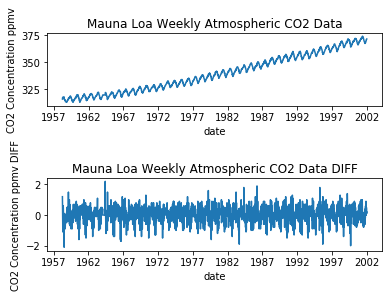

In [14]:


# データの読み込み(StatsModelsのテストデータを用います)
co2_tsdata = sm.datasets.co2.load_pandas().data

# 欠損値の処理
co2_tsdata2 = co2_tsdata.fillna(method="ffill")

# データの階差をとります
co2_tsdata2_diff = co2_tsdata2.diff()


plt.subplot(2,1,1)
plt.title("Mauna Loa Weekly Atmospheric CO2 Data")
plt.xlabel("date")
plt.ylabel("CO2 Concentration ppmv")
plt.plot(co2_tsdata2)

plt.subplot(2,1,2)
plt.title("Mauna Loa Weekly Atmospheric CO2 Data DIFF")
plt.xlabel("date")
plt.ylabel("CO2 Concentration ppmv DIFF")
plt.plot(co2_tsdata2_diff)

plt.subplots_adjust(wspace=0, hspace=1.0)

plt.show()

# 何も書き込まずに実行してください

## 1.2.4 季節調整済み系列

もう一度チャプターの初めの方で見た、マウナロア観測所の二酸化炭素の濃度変化のデータを見てみましょう。

このように1年の周期で周期変動をしていくことを 季節変動 と言いました。 しかし、この折れ線グラフではこの季節変動パターンが邪魔をして時系列データのトレンドがわかりにくくなっています。 このような季節変動のあるデータから季節変動以外のデータの動向を探るため、原系列から季節変動を取り除くことが多くあり、そのように季節変動が取り除かれたデータのことを 季節調整済み系列 といいます。 StatsModelsのtsa.seasonal_decompose()を用いることで原系列を トレンド 、 季節変動 、 不規則変動(残差) に分けることができます。


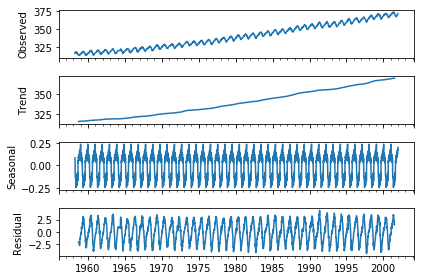

In [15]:

from numpy import nan as na

# データの読み込み(StatsModelsのテストデータを用います)
co2_tsdata = sm.datasets.co2.load_pandas().data
co2_tsdata2 = co2_tsdata.fillna(method="ffill")
# 季節調整を行い原系列をトレンド、季節変動、残差に分けて出力します
fig = sm.tsa.seasonal_decompose(co2_tsdata2, freq=51).plot()
plt.show()
# 何も書き込まず実行してください

In [16]:
"""
1.3.1 期待値(平均)

"""

# データの読み込み(StatsModelsのテストデータを用います)
co2_tsdata = sm.datasets.co2.load_pandas().data
# 欠損値の処理
co2_tsdata2 = co2_tsdata.fillna(method="ffill")
# データの平均値を求める
np.mean(co2_tsdata2)

# 何も書き込まずに実行してください

co2    339.647242
dtype: float64

In [ ]:
1.3.2 分散・標準偏差
1.3.3 自己共分散・自己相関係数


次に時系列データに特有の統計量、 自己共分散 を紹介します。 自己共分散 は同じ時系列データでの別々の時点同士での共分散です。 k時点 離れた自己共分散を k次の自己共分散 という。

さらに、この自己共分散をkの関数と見たものを 自己共分散関数 といいます。

この自己共分散を様々な値間でも比べられるようにしたのが 自己相関係数 と言われるものです。

自己分散と同様に、この自己相関係数をkの関数と見たものを 自己相関関数 といいます。そしてこの 自己相関関数 をグラフで表したものを コレログラム といいます。

自己相関係数は簡単に言うと 過去の値とどれほど似ているのか を表した値になります。


2.1.3 ホワイトノイズ

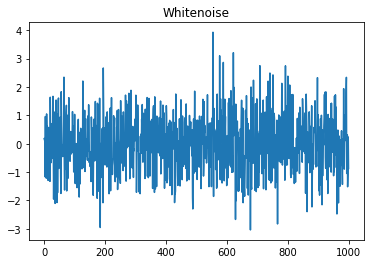

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from pandas import datetime

#ホワイトノイズの設定
mean = 0
std = 1 
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)
# ホワイトノイズのプロット
plt.title("Whitenoise")
plt.plot(samples)
plt.show()
# 何も書き込まずに実行してください



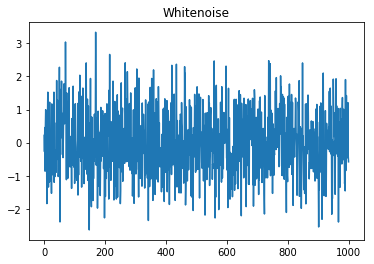

In [18]:
# 定常性の確認
# 実際に見て確認する

#ホワイトノイズの設定
mean = 0
std = 1 
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)
# ホワイトノイズのプロット
plt.title("Whitenoise")
plt.plot(samples)
plt.show()
時系列解析
3.1.2 時間情報をインデックスにする
左向き矢印
前へ
# 何も書き込まずに実行してください

In [24]:
"""
時系列解析
3.1.2 時間情報をインデックスにする

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime

# データの読み込みと整理
sales_sparkring = pd.read_csv(filepath_or_buffer = "https://aidemyexcontentsdata.blob.core.windows.net/data/5060_tsa/monthly-australian-wine-sales-th-sparkling.csv")

print(sales_sparkring.head())
print(sales_sparkring.tail())
# インデックスデータの作成
index = pd.date_range("1980-01-31", "1995-07-31", freq = "M")


# インデックスデータの代入
sales_sparkring.index = index

# "Month"カラムの削除
del sales_sparkring["Month"]

# データの表示    
print(sales_sparkring.head())
print(sales_sparkring.tail())

     Month  sales
0  1980-01   1686
1  1980-02   1591
2  1980-03   2304
3  1980-04   1712
4  1980-05   1471
       Month  sales
182  1995-03   1897
183  1995-04   1862
184  1995-05   1670
185  1995-06   1688
186  1995-07   2031
            sales
1980-01-31   1686
1980-02-29   1591
1980-03-31   2304
1980-04-30   1712
1980-05-31   1471
            sales
1995-03-31   1897
1995-04-30   1862
1995-05-31   1670
1995-06-30   1688
1995-07-31   2031


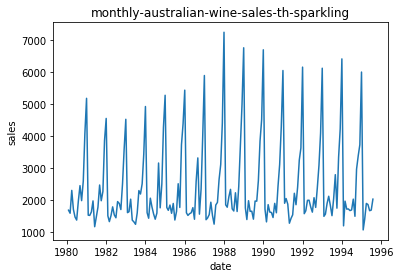

In [25]:

# データを折れ線グラフで表します
# グラフのタイトルを設定
plt.title("monthly-australian-wine-sales-th-sparkling")
# グラフのx軸とy軸の名前設定
plt.xlabel("date")
plt.ylabel("sales")

# データのプロット
# ここに答えを入力してください
plt.plot(sales_sparkring)
plt.show()

## 3.1.4 時系列データを非定常にしているもの

時系列データが定常性を持たないとき、その理由は何でしょうか。
これには

・トレンド

・季節変動

の二つの要因が考えられます。

トレンド に関しては定常性の条件である、期待値が一定という条件を思い出してみてください。もしもデータが正のトレンドを有していれば、その期待値も上昇傾向にあるため定常性があるとは言えません。

季節変動 に関しては定常性の条件である自己相関係数(つまりデータの値の散らばり具合)が一定という条件を思い出してください。おでんのようにある時期において急激に売り上げの増加するような時系列データはこの条件を満たしません。

トレンド 、 季節変動 を取り除き,時系列データを定常化した上で分析を行い、定常化したデータのモデルを構築する。そして再び トレンド や 季節変動 を合成することで原系列のモデルを構築する。ARIMAモデルは、このような流れで時系列データのモデリングを行います。(正確に言えば季節変動がある場合はSARIMAモデルと言われるモデルを扱います)

ARIMAモデルやSARIMAモデルの構築はトレンド、季節変動を取り除き,時系列データを定常化した上で分析を行い、定常化したデータのモデルを構築する。そして再びトレンドや季節変動を合成することで原系列のモデルを構築する、という流れで行われます。


## 3.2.1 トレンド・季節変動の除去

時系列を定常過程にする方法は

・対数変換 によって、変動の 分散 を一様にしたり

・移動平均を取りことにとってトレンドを推定した後に、トレンド成分を除去する

・階差系列に変換することでトレンド・季節変動を除去する

・季節調整を利用する

などがあります。


/Users/nagatafutoshi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


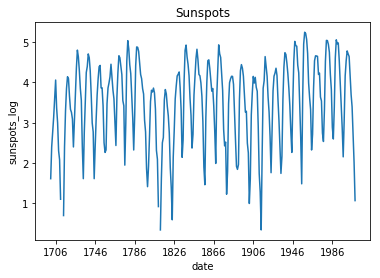

In [26]:
"""
3.2.2 対数変換を用いる方法

対数変換を行うことで、データの変動を穏やかにできます。対数をとることで、数字が大きければ大きいほど、小さめの数に結果が出力されるためです。
つまり、変動の激しい時系列に対して自己共分散を一様にすることができます。
"""

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
import numpy as np

# データの読み込み
sunspots = sm.datasets.sunspots.load_pandas().data
sunspots.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
del sunspots["YEAR"]

# 対数変換
sunspots_log = np.log(sunspots)

# 対数変換後のグラフ
plt.title("Sunspots")
plt.xlabel("date")
plt.ylabel("sunspots_log")
plt.plot(sunspots_log)
plt.show()


## 3.2.3 移動平均を用いる

移動平均をとるには、k個の連続する値の平均値をとります。
移動平均とは時系列データのある一定の区間で”平均”をとる、ということを区間を”移動”させながら繰り返すことです。
こうすることで、元のデータの特徴を残しつつ、データを滑らかにすることができます。

例えば月ごとのデータに季節変動がある場合、12個の連続する値の移動平均を求めることで、季節変動を除去することができトレンド成分を抽出することができます。
次に、もとめた移動平均をもとの系列から引き算します。こうすることで系列のトレンド成分を除去することができます。

移動平均はDATA.rolling(window=何個分の移動平均をとるか).mean()によって求めることができます


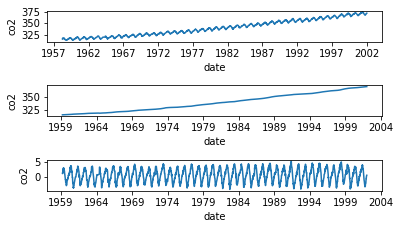

In [27]:


co2_tsdata = sm.datasets.co2.load_pandas().data
# 欠損値の処理
co2_tsdata2 = co2_tsdata.fillna(method="ffill")

# 原系列のグラフ
plt.subplot(6, 1, 1)
plt.xlabel("date")
plt.ylabel("co2")
plt.plot(co2_tsdata2)

# 移動平均を求める
co2_moving_avg = co2_tsdata2.rolling(window=51).mean()

# 移動平均のグラフ
plt.subplot(6, 1, 3)
plt.xlabel("date")
plt.ylabel("co2")
plt.plot(co2_moving_avg)

# 原系列-移動平均グラフ
plt.subplot(6, 1, 5)
plt.xlabel("date")
plt.ylabel("co2")
mov_diff_co2_tsdata = co2_tsdata2-co2_moving_avg 
plt.plot(mov_diff_co2_tsdata)
plt.show()
# 何も書き込まず実行してください


## 3.2.4 階差をとる

前チャプターで学んだ階差系列への変換は定常性を持たせるために用いられる最も一般的な方法です。

階差系列は、時系列データの中の隣り合うデータ同士で引き算していった系列のことでした。
例えば[1, 5, 3, 5, 3, 2, 2, 9]という時系列データの階差系列は[4, -2, 2, -2, -1, 0, 7]です。

1次の階差はDATA.diff()によって求められます。

もし、生成した階差数列からさらに階差数列をとると２次の階差数列ということになります。


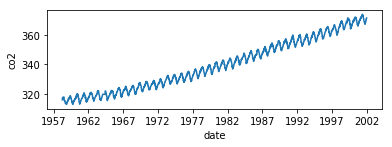

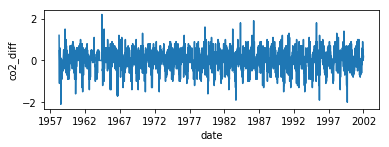

In [31]:


co2_tsdata = sm.datasets.co2.load_pandas().data
# 欠損値の処理
co2_tsdata2 = co2_tsdata.fillna(method="ffill")

# 原系列のプロット
plt.subplot(2, 1, 1)
plt.xlabel("date")
plt.ylabel("co2")
plt.plot(co2_tsdata2)
plt.show()

# 階差をとる
plt.subplot(2, 1, 2)
plt.xlabel("date")
plt.ylabel("co2_diff")

co2_data_diff = co2_tsdata2.diff()

# 階差系列のプロット
plt.plot(co2_data_diff)
plt.show()

## 3.2.5 季節調整の利用

前チャプターで季節調整済み系列について学びました。そのときは原系列をトレンド、季節変動、残差に分けました。 この変換は 

(原系列 = トレンド + 季節変動 + 残差) 

のように表されますからこの式を変換して 

原系列 - トレンド - 季節変動 = 残差 

となります。つまり残差はトレンドと季節変動が取り除かれた定常性のある時系列データになっています。


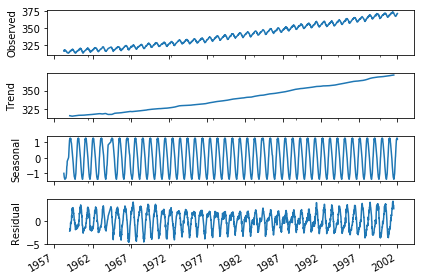

In [32]:


import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import datetime
import statsmodels.api as sm
import numpy as np

# データの読み込み
co2_tsdata = sm.datasets.co2.load_pandas().data
# 欠損値の処理
co2_tsdata2 = co2_tsdata.dropna()

# 季節調整とグラフのプロット
res = sm.tsa.seasonal_decompose(co2_tsdata2,freq=51)
fig = res.plot()
plt.show()
# 何も書き込まず実行してください
